In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import ttk
import csv

# df = pd.read_csv('primaryschool_Edges.csv', header=None)
# G = nx.from_pandas_edgelist(df,source=0, target=1)
# # Customize the node size, color, and shape
# node_size =  [20*G.degree(v) for v in G]

# # Draw the graph with labels and legends
# plt.figure(figsize=(20,20))
# plt.title(f"Virtualize the network",fontsize=28,fontweight="bold")
# nx.draw_kamada_kawai(G, with_labels=True, node_color=node_color,node_size=node_size)
# plt.show()

def read_graph(file,type):
    if (type=='undirected'):
        G=nx.Graph()
        #G = nx.from_pandas_edgelist(df,source=0, target=1)
    else:
        #G = nx.from_pandas_edgelist(df,source=0, target=1,create_using=nx.DiGraph())
        G=nx.DiGraph()
    df = pd.read_csv(file)
    for _, edge in df.iterrows():
        G.add_edge(edge['Source'], edge['Target'])
    return G


#node degree
def adjust_node_degree(G):
    window = tk.Tk()
    window.title("Adjusting Nodes based on calculated metrics node degree")
    window.geometry("{0}x{1}+0+0".format(window.winfo_screenwidth(), window.winfo_screenheight()))
    font_bold = ("Arial", 16, "bold")

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_title("Adjusting Nodes based on calculated metrics node degree",fontsize=26,fontweight="bold")
    plt.title(f"Virtualize the network",fontsize=28,fontweight="bold")
    
    sorted_node= sorted(G.degree(), key=lambda x: x[1], reverse=True)
    label = tk.Label(window,text=f"Max Node : {sorted_node[0][0]} => with Degree: {sorted_node[0][1]}",font=font_bold)
    label.pack()
    
    #slider bar
    slider_value = tk.DoubleVar()
    def change_node_size(val):
        node_size =  [float(val)*G.degree(v) for v in G]
        node_color = [10 * G.degree(v) for v in G]
        draw(G,node_size,node_color,canvas)
        return node_size
    # Create the slider
    slider = tk.Scale(window, variable=slider_value, from_=10, to=1000, orient=tk.HORIZONTAL)
    slider.pack()
    canvas = FigureCanvasTkAgg(fig,master=window)
    
    # Create a button to get the selected value
    # button = tk.Button(window, text="Change size of node", command=get_slider_value)
    # button.pack()
    slider.config(command=change_node_size)
    
    change_node_size(10)
    #get_slider_value()
    create_table(sorted_node,"Nodedegree")
    window.mainloop()
    
G=read_graph('TestCase/TestCase/UndirectedData/RomeoAndJuliet/edges.csv','undirected')
adjust_node_degree(G)

ModuleNotFoundError: No module named 'pandas'

In [7]:
def draw(G,node_size,colors,canvas):
        fig2, ax = plt.subplots(figsize=(12, 6))
        canvas.figure = fig2
        pos = nx.kamada_kawai_layout(G)
        nx.draw_networkx_nodes(G, pos, node_color=colors,node_size=node_size, alpha=1,ax=ax)
        nx.draw_networkx_edges(G, pos, alpha=0.5,ax=ax)
        nx.draw_networkx_labels(G, pos, font_size=7, font_family='sans-serif',ax=ax)
        canvas.draw()
        canvas.get_tk_widget().pack()

In [ ]:
def read_graph_weighted(file,type):
    if (type=='undirected'):
        G=nx.Graph()
        #G = nx.from_pandas_edgelist(df,source=0, target=1)
    else:
        #G = nx.from_pandas_edgelist(df,source=0, target=1,create_using=nx.DiGraph())
        G=nx.DiGraph()
    # Read the edge list from the CSV file.
    
    with open(file, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        edges = [(row['Source'], row['Target'], float(row['Weight'])) for row in reader]

    # Create a weighted graph with the edges.
    G.add_weighted_edges_from(edges)

    # Print the nodes and edges of the graph.
    print("Nodes:", G.nodes)
    print("Edges:")
    for edge in G.edges(data=True):
        print(edge)
    return G

#G=read_graph_weighted('edges.csv','undirected')
#adjust_node_degree(G)

In [ ]:
def edge_weight_weighted(G):
    window = tk.Tk()
    window.title("Adjusting edges based on calculated metrics edge weight")
    window.geometry("{0}x{1}+0+0".format(window.winfo_screenwidth(), window.winfo_screenheight()))
    
    pos = nx.kamada_kawai_layout(G)
    # Get the edge weights
    edge_width = [d['weight'] for (u, v, d) in G.edges(data=True)]
    # Scale down the edge widths by a factor of 10
    weights = [w / 100 for w in edge_width]
    # plt.figure(figsize=(20,20))
    # nx.draw_networkx_nodes(G, pos, node_size=10, node_color='red')
    # nx.draw_networkx_edges(G, pos,width=weights,alpha=.5,edge_color=weights)
    # nx.draw_networkx_labels(G, pos, font_size=10)
    # plt.show()
    
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.set_title("Adjusting edges based on calculated metrics edge weight",fontsize=26,fontweight="bold")
    nx.draw_networkx_nodes(G, pos, node_size=10, node_color='red')
    nx.draw_networkx_edges(G, pos,width=weights,alpha=.5,edge_color=weights)
    nx.draw_networkx_labels(G, pos, font_size=10)

    # Create a canvas widget to display the plot
    canvas = FigureCanvasTkAgg(fig,master=window)
    #canvas.draw()
    canvas.get_tk_widget().pack()
    #create_table(G.edges(data=True),"edge_weight")
    window.mainloop()

    return G
# G=read_graph_weighted('edges.csv','directed')
# adjust_node_degree(G)
# edge_weight_weighted(G)

In [ ]:
def create_table(value,title):
    window = tk.Tk()
    window.title("Table")
    window.geometry("{0}x{1}+0+0".format(window.winfo_screenwidth(), window.winfo_screenheight()))
    # Create a Treeview widget with two columns
    treeview = ttk.Treeview(window, columns=('node', 'page_rank'))
    # Create a Frame to hold the Treeview widget and scrollbar
    # frame = ttk.Frame(window)
    # frame.pack(fill='both', expand=True)

    # Add column headings
    #treeview.heading('#0', text='ID')
    treeview.heading('#0', text='Node')
    treeview.heading('#1', text=title)

    # Create a scrollbar and attach it to the Treeview widget
    scrollbar = ttk.Scrollbar(window, orient='vertical', command=treeview.yview)
    treeview.configure(yscrollcommand=scrollbar.set)

    # Add data to the table
    for node, rank in value:
        treeview.insert('', 'end', text=str(node),values=(rank))

    # Use the pack method to create a layout that fills the available space
    treeview.pack(side='top',fill='both', expand=True)
    scrollbar.pack(side='right',fill='y')
    window.mainloop()

[(1, 2, {'weight': 1.0}), (1, 9, {'weight': 1.0}), (1, 10, {'weight': 1.0}), (1, 12, {'weight': 1.0}), (1, 4, {'weight': 1.0}), (1, 3, {'weight': 1.0}), (1, 15, {'weight': 1.0}), (2, 7, {'weight': 1.0}), (2, 8, {'weight': 1.0}), (2, 5, {'weight': 1.0}), (2, 3, {'weight': 1.0}), (2, 6, {'weight': 1.0}), (9, 10, {'weight': 1.0}), (9, 12, {'weight': 1.0}), (9, 18, {'weight': 1.0}), (10, 12, {'weight': 1.0}), (10, 18, {'weight': 1.0}), (4, 13, {'weight': 1.0}), (3, 14, {'weight': 1.0}), (7, 6, {'weight': 1.0}), (7, 8, {'weight': 1.0}), (7, 16, {'weight': 1.0}), (7, 17, {'weight': 1.0}), (7, 20, {'weight': 1.0}), (7, 11, {'weight': 1.0}), (8, 6, {'weight': 1.0}), (8, 16, {'weight': 1.0}), (8, 17, {'weight': 1.0}), (8, 20, {'weight': 1.0}), (8, 11, {'weight': 1.0}), (5, 20, {'weight': 1.0})]


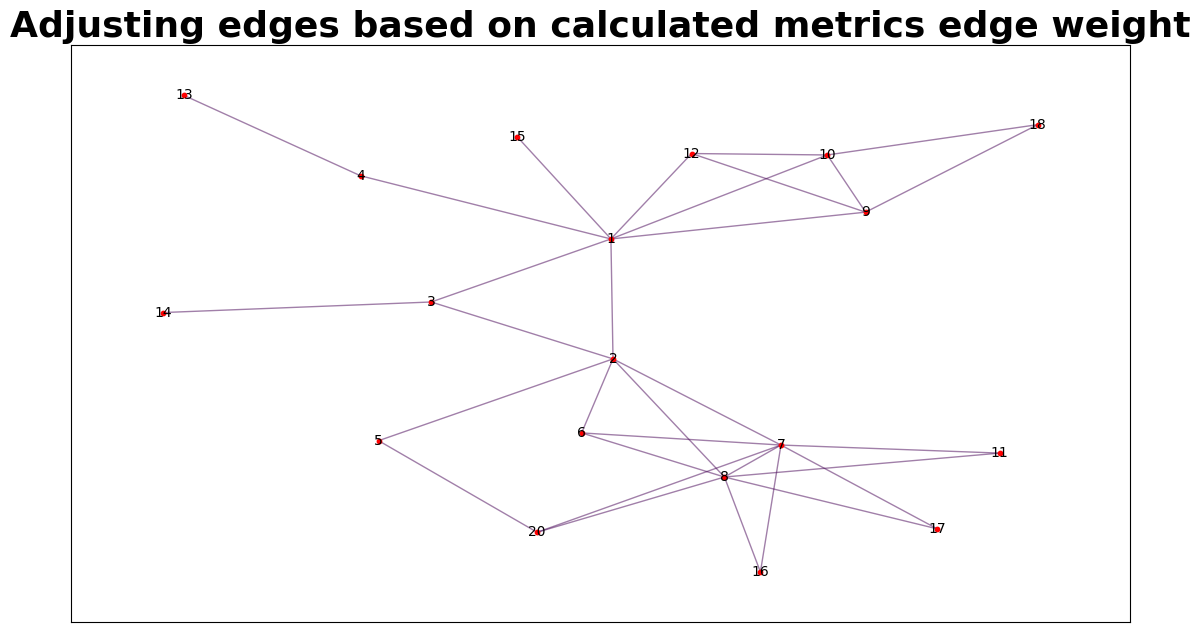

In [ ]:
def edge_weight(file,type):
    import csv
    window = tk.Tk()
    window.title("Adjusting edges based on calculated metrics edge weight")
    window.geometry("{0}x{1}+0+0".format(window.winfo_screenwidth(), window.winfo_screenheight()))
    if(type=='undirected'):
        M=nx.MultiGraph()
        #M=nx.read_edgelist(file, delimiter=',', nodetype=int, data=(('weight', float),),create_using=nx.MultiGraph())
        #print(nx.is_directed(M))
    else:
        M=nx.MultiDiGraph()
        #M=nx.read_edgelist(file, delimiter=',', nodetype=int, data=(('weight', float),),create_using=nx.MultiDiGraph())
        #print(nx.is_directed(M))
    df = pd.read_csv(file)
    for _, edge in df.iterrows():
        M.add_edge(edge['Source'], edge['Target'])
    G = nx.Graph()
    for u,v,data in M.edges(data=True):
        w = data['weight'] if 'weight' in data else 1.0
        if G.has_edge(u,v):
            G[u][v]['weight'] += w
        else:
            G.add_edge(u, v, weight=w)

    print(G.edges(data=True))

    pos = nx.kamada_kawai_layout(G)
    # Get the edge weights
    weights = [data['weight'] for u, v, data in G.edges(data=True)]
    # Scale down the edge widths by a factor of 10
    #weights = [w / 100 for w in weights]
    # plt.figure(figsize=(20,20))
    # nx.draw_networkx_nodes(G, pos, node_size=10, node_color='red')
    # nx.draw_networkx_edges(G, pos,width=weights,alpha=.5,edge_color=weights)
    # nx.draw_networkx_labels(G, pos, font_size=10)
    # plt.show()
    
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.set_title("Adjusting edges based on calculated metrics edge weight",fontsize=26,fontweight="bold")
    nx.draw_networkx_nodes(G, pos, node_size=10, node_color='red')
    nx.draw_networkx_edges(G, pos,width=weights,alpha=.5,edge_color=weights)
    nx.draw_networkx_labels(G, pos, font_size=10)

    # Create a canvas widget to display the plot
    canvas = FigureCanvasTkAgg(fig,master=window)
    #canvas.draw()
    canvas.get_tk_widget().pack()
    #create_table(G.edges(data=True),"edge_weight")
    window.mainloop()

    return G
    
#edge_weight('TestCase/TestCase/UndirectedData/RomeoAndJuliet/edges.csv','undirected')

[{1: 0, 2: 1, 9: 0, 10: 0, 12: 0, 4: 2, 3: 3, 7: 1, 8: 1, 5: 1, 13: 2, 6: 1, 14: 3, 15: 0, 16: 1, 17: 1, 18: 0, 20: 1, 11: 1}]
Community 0: [1, 9, 10, 12, 15, 18]
Community 1: [2, 7, 8, 5, 6, 16, 17, 20, 11]
Community 2: [4, 13]
Community 3: [3, 14]


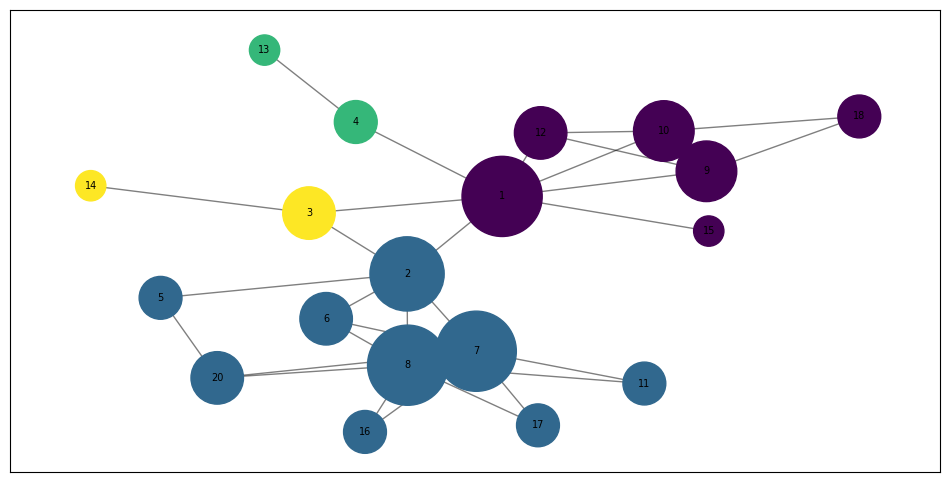

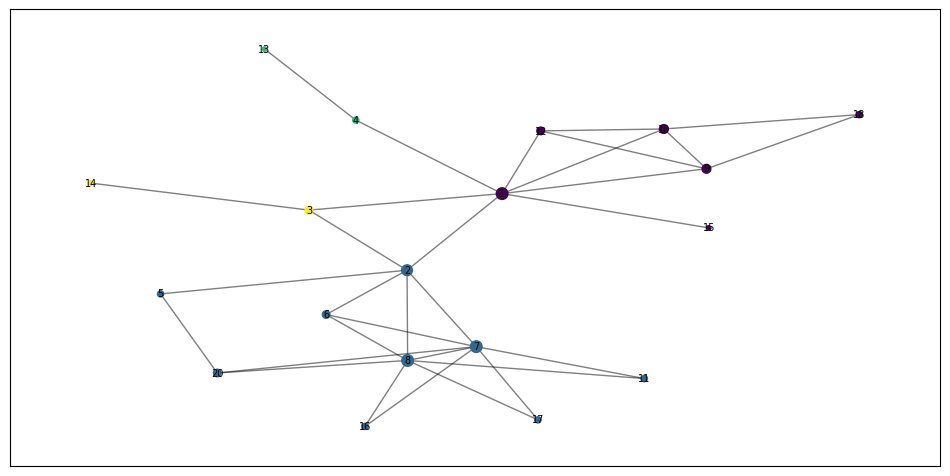

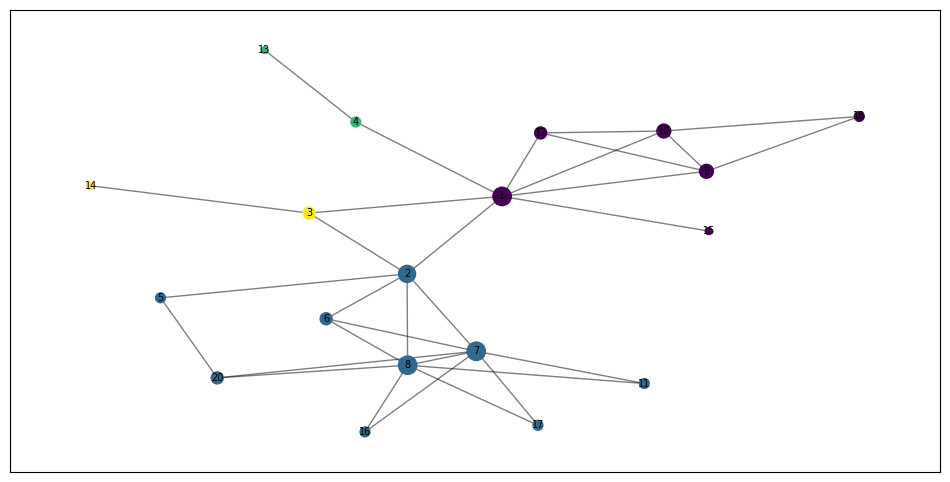

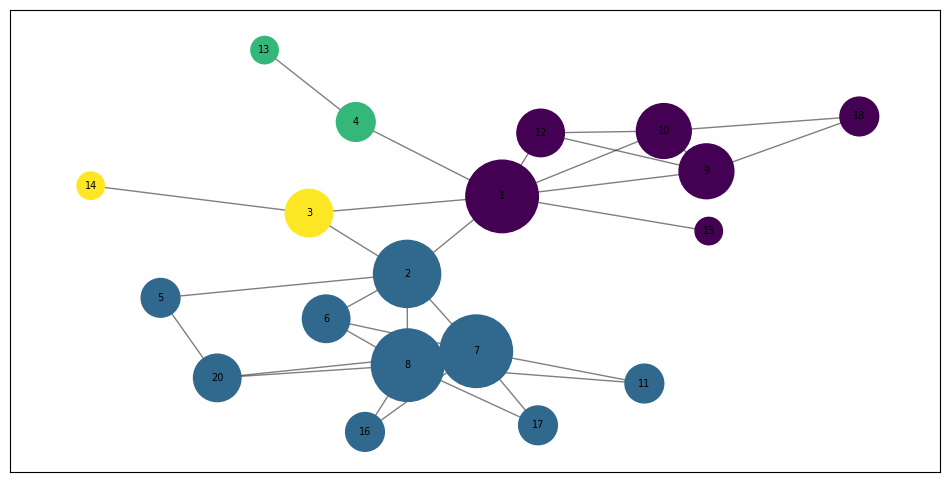

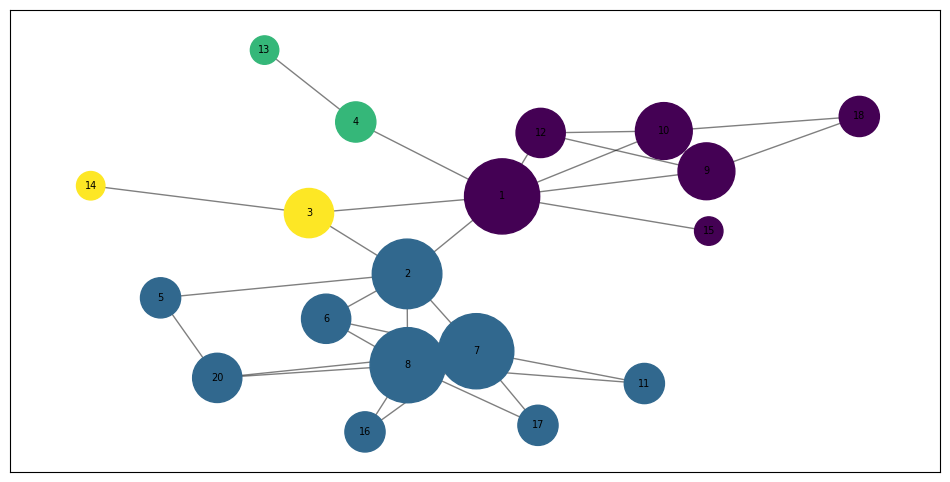

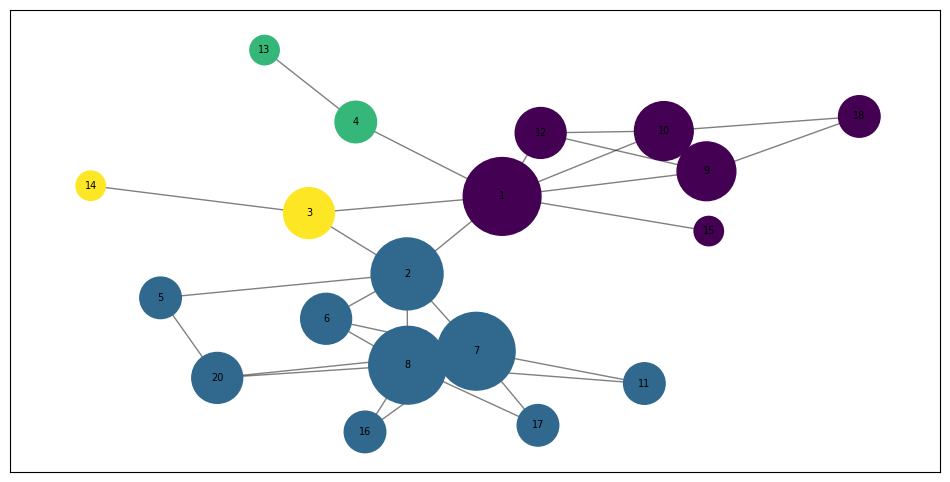

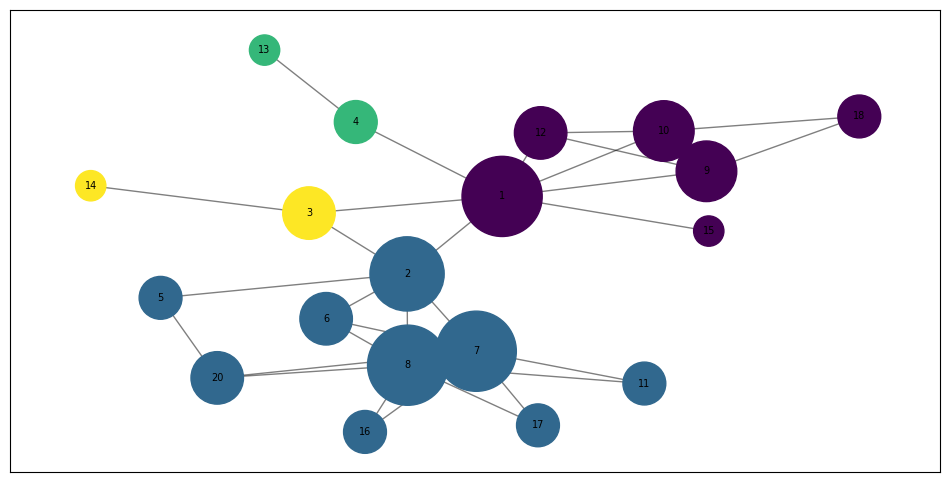

In [ ]:
def louvian_community_detection(G,weighted):
    if(nx.is_directed(G)):
        G = G.to_undirected()
    from community import community_louvain
    window = tk.Tk()
    window.title("community detection With Louvain")
    window.geometry("{0}x{1}+0+0".format(window.winfo_screenwidth(), window.winfo_screenheight()))
    font_bold = ("Arial", 16, "bold")

    # Compute the communities using the Louvain algorithm
    partitions = []
    
    if(weighted=='yes'):
        partition = community_louvain.best_partition(G,weight='weighted')
    else:
        partition = community_louvain.best_partition(G)
    partitions.append(partition)

    # Print the number of communities and the nodes in each community
    communities = {}
    for node, comm_id in partition.items():
        if comm_id in communities:
            communities[comm_id].append(node)
        else:
            communities[comm_id] = [node]

    print(partitions)
    label = tk.Label(window, text=f"Number of communities: {len(communities)}",font=font_bold,wraplength=1000)
    label.pack()
    for comm_id, nodes in communities.items():
        print(f"Community {comm_id}: {nodes}")
        label2 = tk.Label(window, text=f"Community {comm_id}: {nodes}")
        label2.pack()

        
    for i, partition in enumerate(partitions):
        colors = [partition[node] for node in G.nodes()]
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_title("community detection With Louvain",fontsize=28,fontweight="bold")

    #slider bar
    slider_value = tk.DoubleVar()
    def change_node_size(val):
        node_size =  [float(val)*G.degree(v) for v in G]
        draw(G,node_size,colors,canvas)
        return node_size
    # Create the slider
    slider = tk.Scale(window, variable=slider_value, from_=10, to=1000, orient=tk.HORIZONTAL)
    slider.pack()
    canvas = FigureCanvasTkAgg(fig,master=window)
    slider.config(command=change_node_size)
    
    change_node_size(10)
    
    window.mainloop()

G=read_graph('TestCase/TestCase/UndirectedData/RomeoAndJuliet/edges.csv','undirected')
louvian_community_detection(G,'no')

In [ ]:
def page_rank(G,weighted):
    window = tk.Tk()
    window.title("Page Rank")
    window.geometry("{0}x{1}+0+0".format(window.winfo_screenwidth(), window.winfo_screenheight()))
    font_bold = ("Arial", 16, "bold")
    #page Rank
    if(weighted=='yes'):
        ranks_pr = nx.pagerank(G,alpha = 0.85,tol=.001,weight='weight')
    else:
        ranks_pr = nx.pagerank(G,alpha = 0.85,tol=.001)

    #store high to low
    pr_sorted = sorted(ranks_pr.items(), key=lambda x: x[1], reverse=True)

    # Find nodes with highest PageRank scores
    max_pr = max(ranks_pr.values())
    top_nodes = [n for n, pr_score in ranks_pr.items() if pr_score == max_pr]
    label = tk.Label(window,text=f"Max Node : {top_nodes} => with score: {max_pr}",font=font_bold)
    label.pack()
    #print sorted page rank
    for node, score in pr_sorted:
        print("Node {} has PageRank score {}".format(node, score))
        
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_title("Page Rank",fontsize=28,fontweight="bold")
    
    #slider bar
    slider_value = tk.DoubleVar()
    def change_node_size(val):
        node_color = ['red' if n in top_nodes else 'green' for n in G.nodes()]
        node_size =  [float(val)*6 if n in top_nodes else float(val)*4 for n in G.nodes()]
        draw(G,node_size,node_color,canvas)
        return node_size
    # Create the slider
    slider = tk.Scale(window, variable=slider_value, from_=10, to=1000, orient=tk.HORIZONTAL)
    slider.pack()
    canvas = FigureCanvasTkAgg(fig,master=window)
    
    slider.config(command=change_node_size)
    
    change_node_size(10)

    create_table(pr_sorted,"Page Rank")
    window.mainloop()

# # G=read_graph('TestCase/TestCase/UndirectedData/RomeoAndJuliet/edges.csv','undirected')
# G=read_graph('TestCase/TestCase/Directed/Friends/Edges.csv','undirected')
# page_rank(G,'no')

In [ ]:
def degree_centrality(G):
    window = tk.Tk()
    window.title("degree centrality")
    window.geometry("{0}x{1}+0+0".format(window.winfo_screenwidth(), window.winfo_screenheight()))
    font_bold = ("Arial", 16, "bold")
    #degree centrality
    deg_centrality = nx.degree_centrality(G)
    # Sort the degree centrality dictionary in descending order
    sorted_deg_centrality = dict(sorted(deg_centrality.items(), key=lambda x: x[1], reverse=True))
    sorted_deg = sorted(deg_centrality.items(), key=lambda x: x[1], reverse=True)
    #print sorted degree
    print(f"degree centrality: {sorted_deg_centrality}")
    
    # Find nodes with highest nodedegree
    max_deg = max(sorted_deg_centrality.values())
    top_nodes = [n for n, pr_score in deg_centrality.items() if pr_score == max_deg]
    label = tk.Label(window,text=f"Max Node : {top_nodes} => with degree: {max_deg}",font=font_bold)
    label.pack()
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_title(f"degree centrality",fontsize=28,fontweight="bold")
    #slider bar
    slider_value = tk.DoubleVar()
    def change_node_size(val):
        node_color = [20000 * n for n in deg_centrality.values()]
        node_size =  [v * float(val) for v in deg_centrality.values()]
        draw(G,node_size,node_color,canvas)
        return node_size
    # Create the slider
    slider = tk.Scale(window, variable=slider_value, from_=10, to=10000, orient=tk.HORIZONTAL)
    slider.pack()
    canvas = FigureCanvasTkAgg(fig,master=window)
    
    slider.config(command=change_node_size)
    
    change_node_size(10)
    create_table(sorted_deg,"Degree centrality")
    window.mainloop()

# G=read_graph('TestCase/TestCase/UndirectedData/RomeoAndJuliet/edges.csv','undirected')
# G=read_graph('TestCase/TestCase/Directed/Friends/Edges.csv','directed')
# degree_centrality(G)

In [ ]:
#betweenness centrality
# Compute the  centrality of the nodes
def betweenness_centrality(G,weighted):
    window = tk.Tk()
    window.title("betweenness centrality")
    window.geometry("{0}x{1}+0+0".format(window.winfo_screenwidth(), window.winfo_screenheight()))
    font_bold = ("Arial", 16, "bold")
    if(weighted=='yes'):
        bet_centrality = nx.betweenness_centrality(G,weight='weight')
    else:
        bet_centrality = nx.betweenness_centrality(G)
    # Sort the betweenness centrality dictionary in descending order
    sorted_bet_centrality = dict(sorted(bet_centrality.items(), key=lambda x: x[1], reverse=True))
    sorted_bet= (sorted(bet_centrality.items(), key=lambda x: x[1], reverse=True))
    print(f"Betweeness : {sorted_bet_centrality}")
    
    # Find nodes with highest betweness
    max_bet = max(sorted_bet_centrality.values())
    top_nodes = [n for n, pr_score in bet_centrality.items() if pr_score == max_bet]
    label = tk.Label(window,text=f"Max Node : {top_nodes} => with betweenness: {max_bet}",font=font_bold)
    label.pack()
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_title(f"betweenness centrality",fontsize=28,fontweight="bold")
    #slider bar
    slider_value = tk.DoubleVar()
    def change_node_size(val):
        node_color = [20000 * n for n in bet_centrality.values()]
        node_size =  [v * float(val) for v in bet_centrality.values()]
        draw(G,node_size,node_color,canvas)
        return node_size
    # Create the slider
    slider = tk.Scale(window, variable=slider_value, from_=10, to=10000, orient=tk.HORIZONTAL)
    slider.pack()
    canvas = FigureCanvasTkAgg(fig,master=window)
    
    slider.config(command=change_node_size)
    
    change_node_size(10)

    create_table(sorted_bet,"Betweenness centrality")
    window.mainloop()
    
# G=read_graph('TestCase/TestCase/UndirectedData/RomeoAndJuliet/edges.csv','undirected')
# G=read_graph('TestCase/TestCase/Directed/Friends/Edges.csv','directed')
# betweenness_centrality(G,'no')

In [ ]:
def clossness_centrality(G,weighted):
    #clossness centrality
    # Compute the clossness centrality of the nodes
    window = tk.Tk()
    window.title("clossness centrality")
    window.geometry("{0}x{1}+0+0".format(window.winfo_screenwidth(), window.winfo_screenheight()))
    font_bold = ("Arial", 16, "bold")
    if(weighted=='yes'):
        closeness_centrality = nx.closeness_centrality(G,distance='weight')
    else:
        closeness_centrality = nx.closeness_centrality(G)

    # Sort the clossness centrality dictionary in descending order
    sorted_clossness_centrality = dict(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True))
    sorted_clossness = (sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True))
    print(f"clossness centrality: {sorted_clossness_centrality}")
    
    # Find nodes with highest clossness
    max_close = max(sorted_clossness_centrality.values())
    top_nodes = [n for n, pr_score in closeness_centrality.items() if pr_score == max_close]
    label = tk.Label(window,text=f"Max Node : {top_nodes} => with closeness: {max_close}",font=font_bold)
    label.pack()

    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_title(f"clossness centrality",fontsize=28,fontweight="bold")
    #slider bar
    slider_value = tk.DoubleVar()
    def change_node_size(val):
        node_color = [20000 * n for n in closeness_centrality.values()]
        node_size =  [v * float(val) for v in closeness_centrality.values()]
        draw(G,node_size,node_color,canvas)
        return node_size
    # Create the slider
    slider = tk.Scale(window, variable=slider_value, from_=10, to=10000, orient=tk.HORIZONTAL)
    slider.pack()
    canvas = FigureCanvasTkAgg(fig,master=window)
    
    slider.config(command=change_node_size)
    
    change_node_size(10)
    
    create_table(sorted_clossness,"Clossness centrality")
    window.mainloop()

# G=read_graph('TestCase/TestCase/UndirectedData/RomeoAndJuliet/edges.csv','undirected')
# G=read_graph('TestCase/TestCase/Directed/Friends/Edges.csv','directed')
# clossness_centrality(G,'no')

In [ ]:
def harmonic_centrality(G,weighted):
    #harmonic centrality
    # Compute the harmonic centrality of the nodes
    window = tk.Tk()
    window.title("harmonic centrality")
    window.geometry("{0}x{1}+0+0".format(window.winfo_screenwidth(), window.winfo_screenheight()))
    font_bold = ("Arial", 16, "bold")
    if(weighted=='yes'):
        har_centrality = nx.harmonic_centrality(G,distance='weight')
    else:
        har_centrality = nx.harmonic_centrality(G)
    # Sort the harmonic centrality dictionary in descending order
    sorted_harmonic_centrality = dict(sorted(har_centrality.items(), key=lambda x: x[1], reverse=True))
    sorted_harmonic = (sorted(har_centrality.items(), key=lambda x: x[1], reverse=True))
    print(f"harmonic centrality: {sorted_harmonic_centrality}")
    
    # Find nodes with highest harmonic
    max_har = max(sorted_harmonic_centrality.values())
    top_nodes = [n for n, pr_score in har_centrality.items() if pr_score == max_har]
    label = tk.Label(window,text=f"Max Node : {top_nodes} => with harmonic: {max_har}",font=font_bold)
    label.pack()
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_title(f"harmonic centrality",fontsize=28,fontweight="bold")
    #slider bar
    slider_value = tk.DoubleVar()
    def change_node_size(val):
        node_color = [20000 * n for n in har_centrality.values()]
        node_size =  [v * float(val) for v in har_centrality.values()]
        draw(G,node_size,node_color,canvas)
        return node_size
    # Create the slider
    slider = tk.Scale(window, variable=slider_value, from_=10, to=10000, orient=tk.HORIZONTAL)
    slider.pack()
    canvas = FigureCanvasTkAgg(fig,master=window)
    
    slider.config(command=change_node_size)
    
    change_node_size(10)
    create_table(sorted_harmonic,"Harmonic centrality")
    window.mainloop()
# G=read_graph('TestCase/TestCase/UndirectedData/RomeoAndJuliet/edges.csv','undirected')
# G=read_graph('TestCase/TestCase/Directed/Friends/Edges.csv','directed')
# harmonic_centrality(G,'no')

In [ ]:
def eigenvector_centrality(G,weighted):
    #eigenvector centrality
    # Compute the eigenvector centrality of the nodes
    window = tk.Tk()
    window.title("eigenvector centrality")
    window.geometry("{0}x{1}+0+0".format(window.winfo_screenwidth(), window.winfo_screenheight()))
    font_bold = ("Arial", 16, "bold")
    if(weighted=='yes'):
        eig_centrality = nx.eigenvector_centrality(G,weight='weight')
    else:
        eig_centrality = nx.eigenvector_centrality(G)
    

    # Sort the eigenvector centrality dictionary in descending order
    sorted_eigenvector_centrality = dict(sorted(eig_centrality.items(), key=lambda x: x[1], reverse=True))
    sorted_eigenvector = (sorted(eig_centrality.items(), key=lambda x: x[1], reverse=True))
    print(f"eigenvector centrality: {sorted_eigenvector_centrality}")
    # Find nodes with highest eigenvector
    max_rig = max(sorted_eigenvector_centrality.values())
    top_nodes = [n for n, pr_score in eig_centrality.items() if pr_score == max_rig]
    label = tk.Label(window,text=f"Max Node : {top_nodes} => with eigenvector: {max_rig}",font=font_bold)
    label.pack()
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_title(f"eigenvector centrality",fontsize=28,fontweight="bold")
    #slider bar
    slider_value = tk.DoubleVar()
    def change_node_size(val):
        node_color = [20000 * n for n in eig_centrality.values()]
        node_size =  [v * float(val) for v in eig_centrality.values()]
        draw(G,node_size,node_color,canvas)
        return node_size
    # Create the slider
    slider = tk.Scale(window, variable=slider_value, from_=10, to=10000, orient=tk.HORIZONTAL)
    slider.pack()
    canvas = FigureCanvasTkAgg(fig,master=window)
    
    slider.config(command=change_node_size)
    
    change_node_size(10)
    create_table(sorted_eigenvector,"Eigenvector centrality")
    window.mainloop()
# G=read_graph('TestCase/TestCase/UndirectedData/RomeoAndJuliet/edges.csv','undirected')
# G=read_graph('TestCase/TestCase/Directed/Friends/Edges.csv','directed')
# eigenvector_centrality(G,'no')

In [ ]:
def modularity_evualation(G,weighted):
    from networkx.algorithms.community import greedy_modularity_communities
    
    window = tk.Tk()
    window.title("Modularity Community Evualation (Internal)")
    window.geometry("{0}x{1}+0+0".format(window.winfo_screenwidth(), window.winfo_screenheight()))
    font_bold = ("Arial", 24, "bold")
    
    # Find the communities using the Louvain algorithm
    if(weighted=='yes'):
        communities = greedy_modularity_communities(G,weight='weight')
    else:
        communities = greedy_modularity_communities(G)
    # Print the communities
    label4 = tk.Label(window,text=f"",font=font_bold)
    label4.pack()
    for i, c in enumerate(communities):
        print(f"Community {i+1}: {c}")
        label = tk.Label(window,text=f"Community {i+1}: {c}",font={"Arial", 14},wraplength=1000)
        label.pack()
        
    # Create a dictionary that maps each node to its community index
    node_color = {}
    for i, com in enumerate(communities):
        for node in com:
            node_color[node] = i

    # Calculate the modularity of the partition
    modularity = nx.algorithms.community.modularity(G, communities)
    print("modularity: ")
    print(modularity)
    label3= tk.Label(window,text=f"",font=font_bold)
    label3.pack()
    label2 = tk.Label(window,text=f"Modularity: {modularity}",font=font_bold)
    label2.pack()

    window.mainloop()
    
# G=read_graph('primaryschool_Edges.csv','undirected')
# modularity_evualation(G,'no')

In [ ]:
def NMI_external(G,weighted):
    import networkx as nx
    from networkx.algorithms.community import greedy_modularity_communities
    from sklearn.metrics.cluster import normalized_mutual_info_score
    from cdlib import evaluation, algorithms
    window = tk.Tk()
    window.title("NMI Community Evualation (External)")
    window.geometry("{0}x{1}+0+0".format(window.winfo_screenwidth(), window.winfo_screenheight()))
    font_bold = ("Arial", 24, "bold")
    
    # Compute the communities using modularity optimization
    # communities1 = list(greedy_modularity_communities(G))
    # communities2 = list(greedy_modularity_communities(G))

    # # Convert the communities to lists of node labels
    # labels1 = [i for c in communities1 for i in c]
    # labels2 = [i for c in communities2 for i in c]
    if(nx.is_directed(G)):
        G=G.to_undirected()
    #greedy_modularity = algorithms.greedy_modularity(G)
    if(weighted=='yes'):
        louvian_communities = algorithms.louvain(G,weight='weight')
        leiden_communities = algorithms.leiden(G,weights='weight')
    else:
        louvian_communities = algorithms.louvain(G)
        leiden_communities = algorithms.leiden(G)

    nmi = evaluation.normalized_mutual_information(louvian_communities, leiden_communities)

    # Compute the NMI between the two sets of communities
    # nmi = normalized_mutual_info_score(labels1, labels2)

    # Print the NMI
    print(f"NMI score between Louvain and Leiden communities: {str(nmi[0])}")
    #print(nmi)
    label = tk.Label(window,text=f"NMI score between Louvain and Leiden communities: ",font=font_bold)
    label.place(relx=.5,rely=.4,anchor="center")
    label = tk.Label(window,text=f"{str(nmi[0])}",font=font_bold)
    label.place(relx=.5,rely=.5,anchor="center")
    
    window.mainloop()
# G=read_graph_weighted('edges.csv','undirected')
# NMI_external(G,'yes')

In [ ]:
def condundace_internal(G,weighted):
    from networkx.algorithms.community import greedy_modularity_communities
    from networkx.algorithms.cuts import conductance

    window = tk.Tk()
    window.title("Condundance Community Evualation (Internal)")
    window.geometry("{0}x{1}+0+0".format(window.winfo_screenwidth(), window.winfo_screenheight()))
    font_bold = ("Arial", 24, "bold")
    
    # Compute the communities using modularity optimization
    if(weighted=='yes'):
        communities = list(greedy_modularity_communities(G,weight='weight'))
    else:
        communities = list(greedy_modularity_communities(G))
    # Compute the conductance for each community
    #cond_values = []
    label2 = tk.Label(window,text=f"")
    label2.pack()
    for i, c in enumerate(communities):
        cond = conductance(G, c)
        print(f"Community {i}: Conductance = {cond:.3f}")
        label = tk.Label(window,text=f"Community {i}: Conductance = {cond:.3f}",font=font_bold)
        label.pack()

    # Draw the network with node colors according to conductance
    # plt.figure(figsize=(8,8))
    # pos = nx.spring_layout(G)
    # nx.draw_networkx_nodes(G, pos, node_color=cond_values, cmap=cm, node_size=300)
    # nx.draw_networkx_edges(G, pos, alpha=0.5)
    # plt.axis('off')
    # plt.show()
    window.mainloop()
    
# condundace_internal(G,'yes')

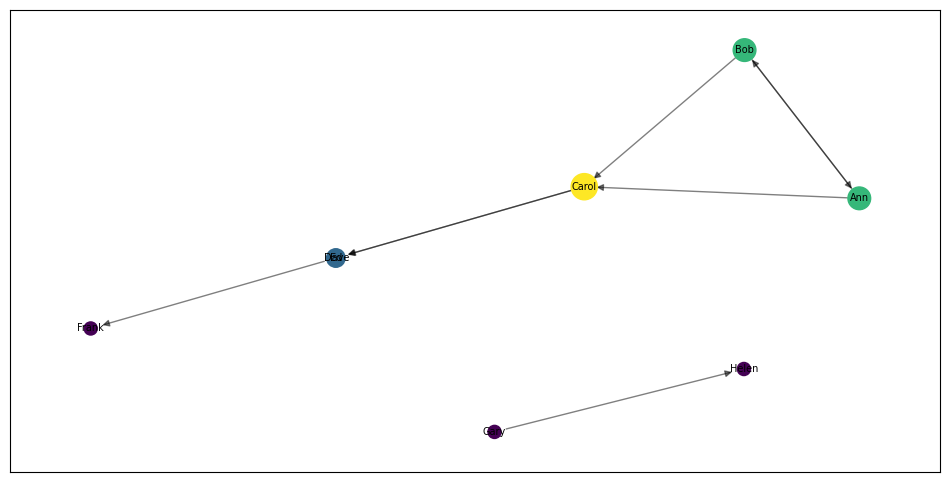

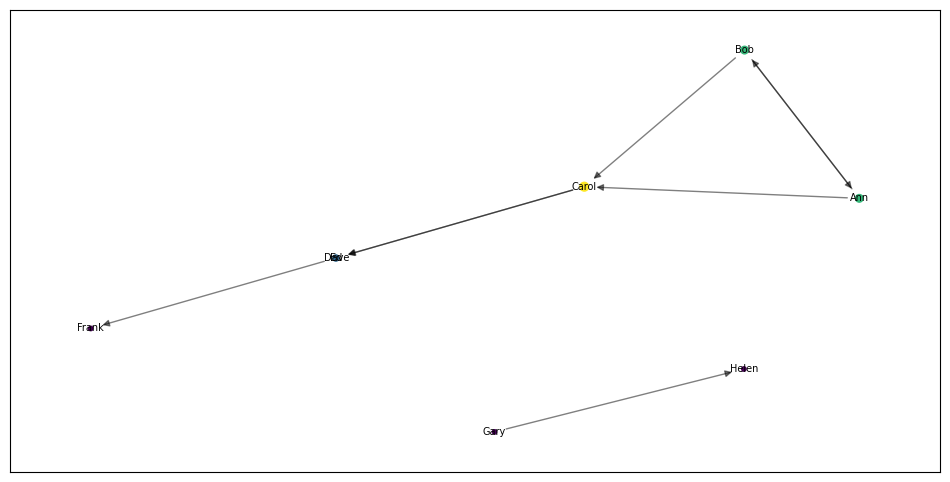

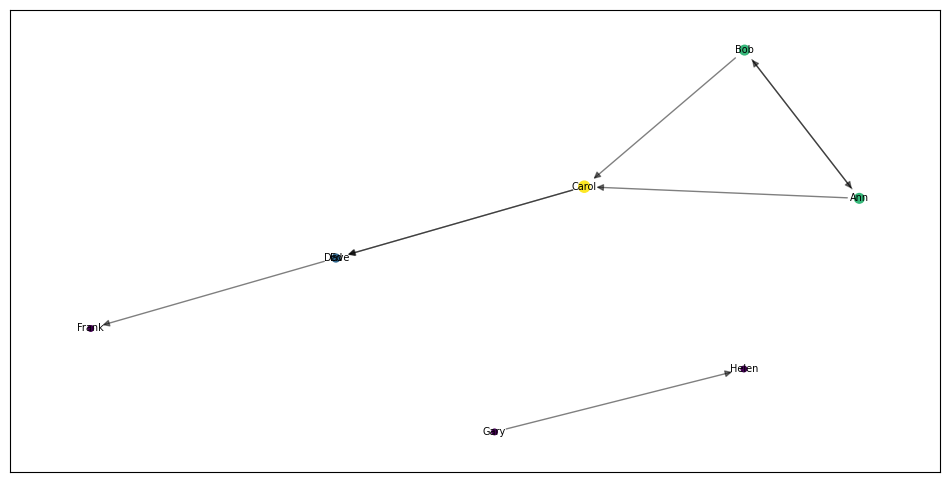

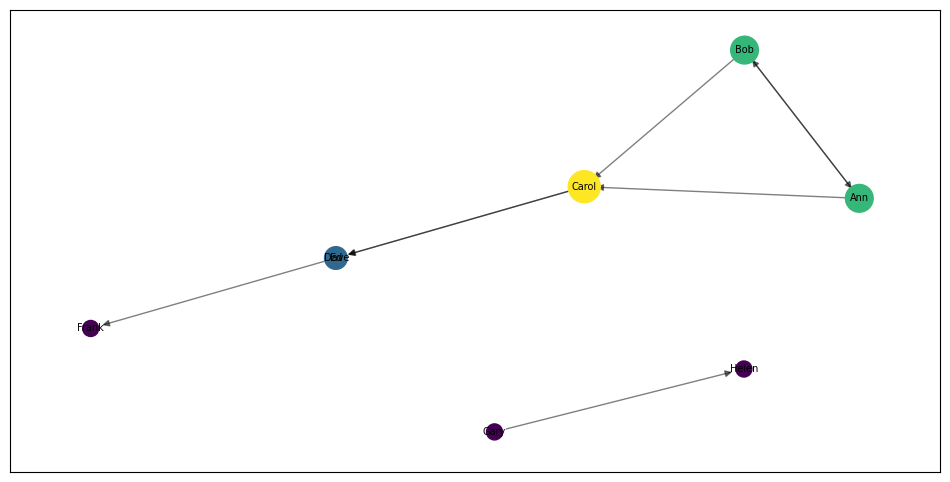

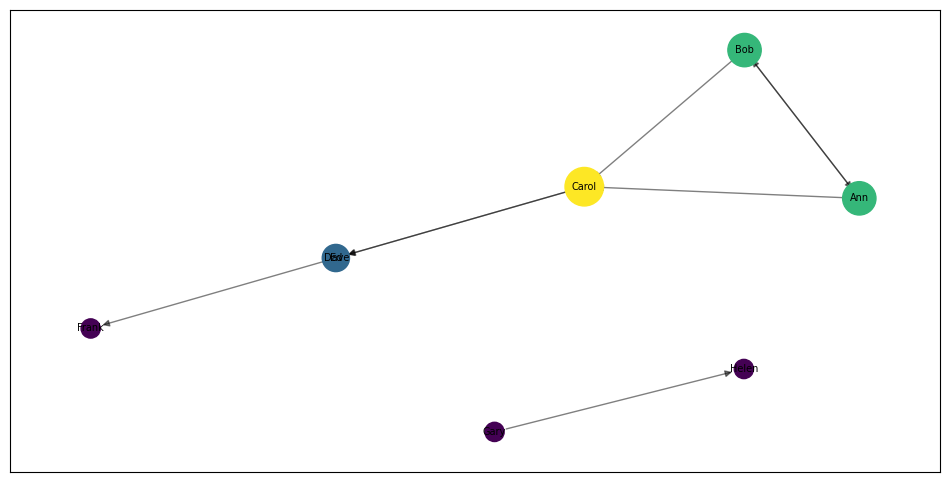

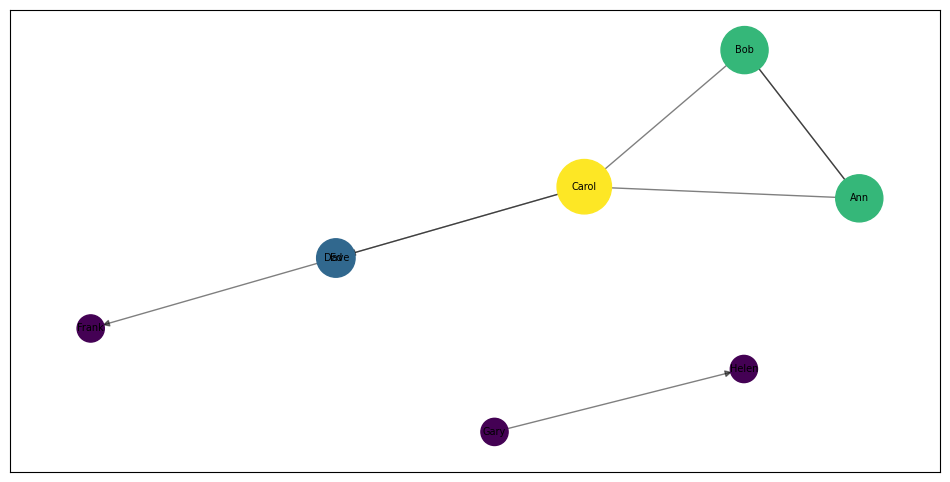

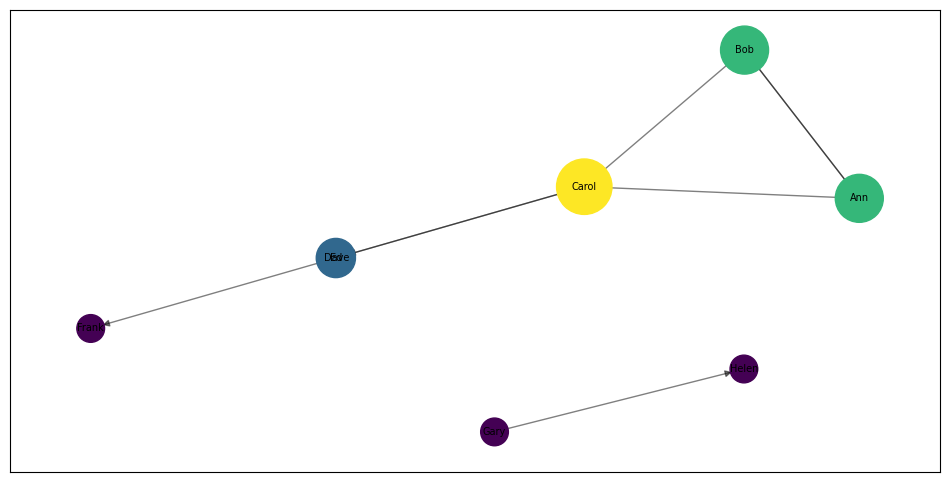

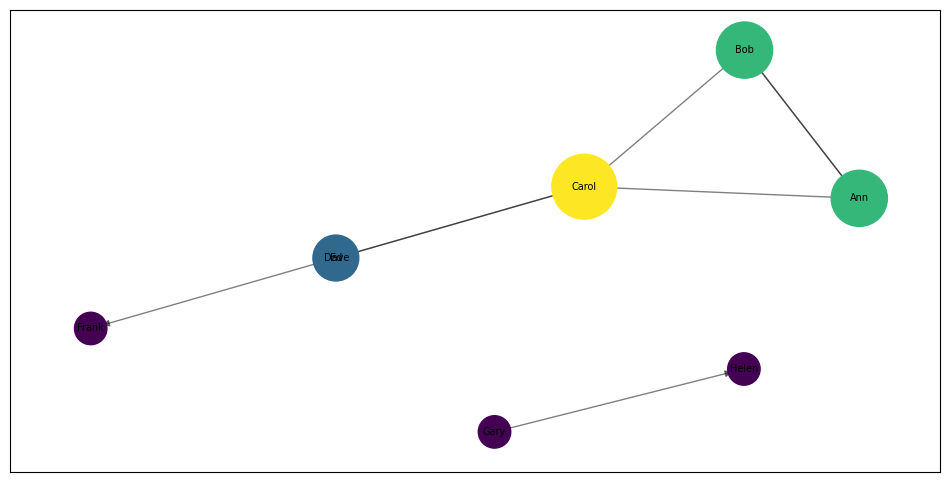

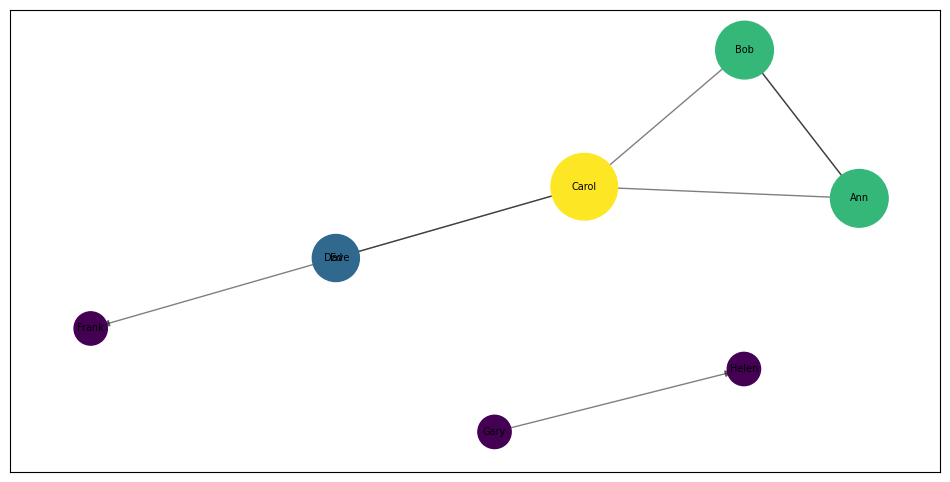

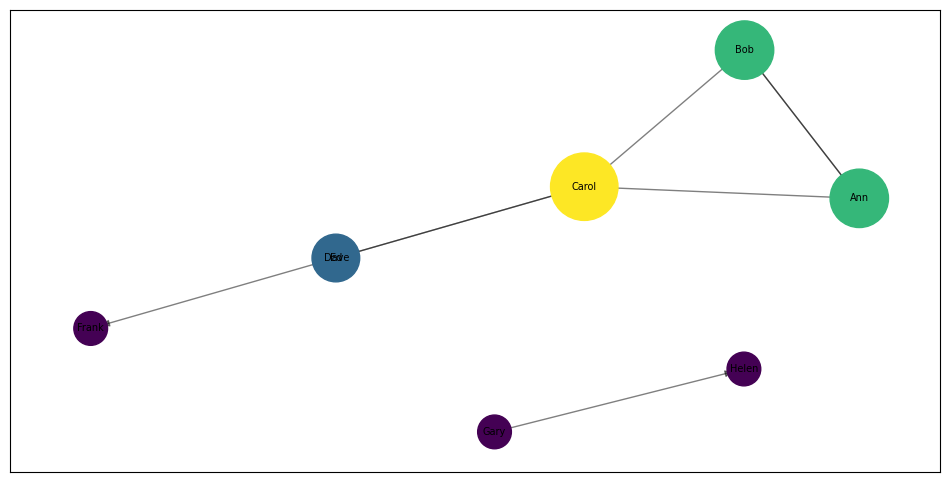

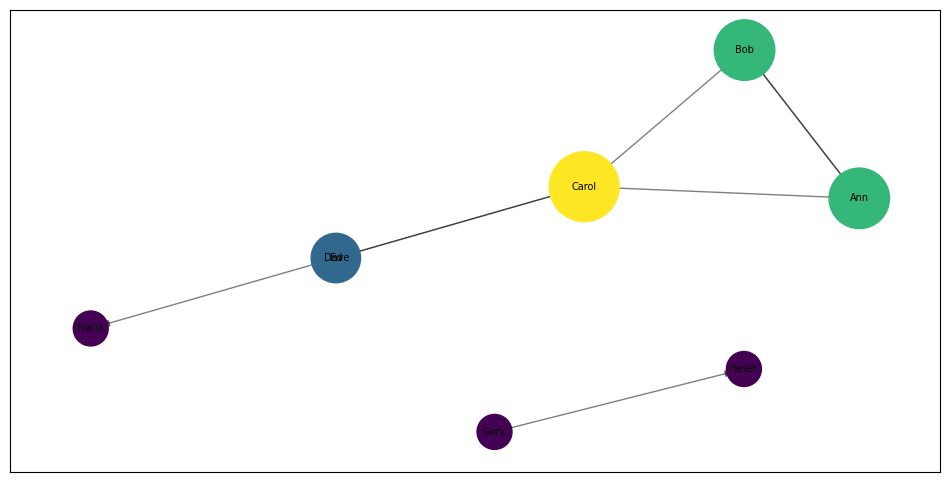

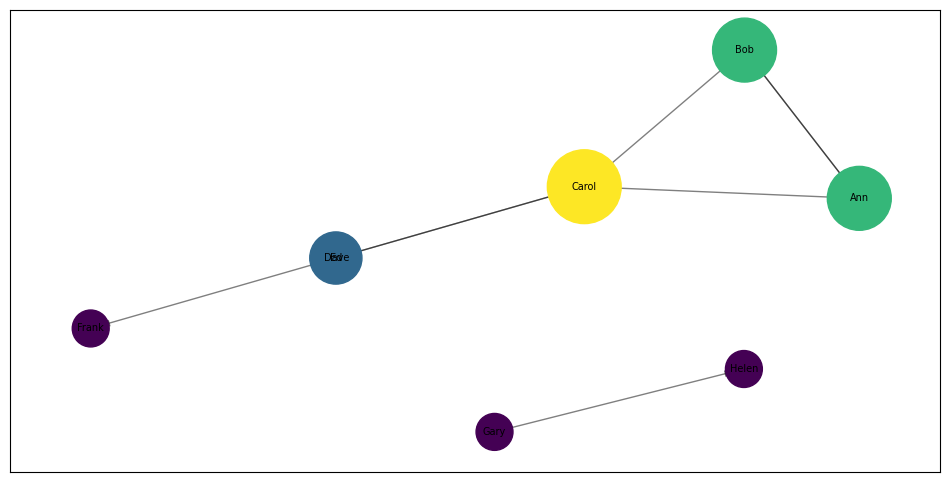

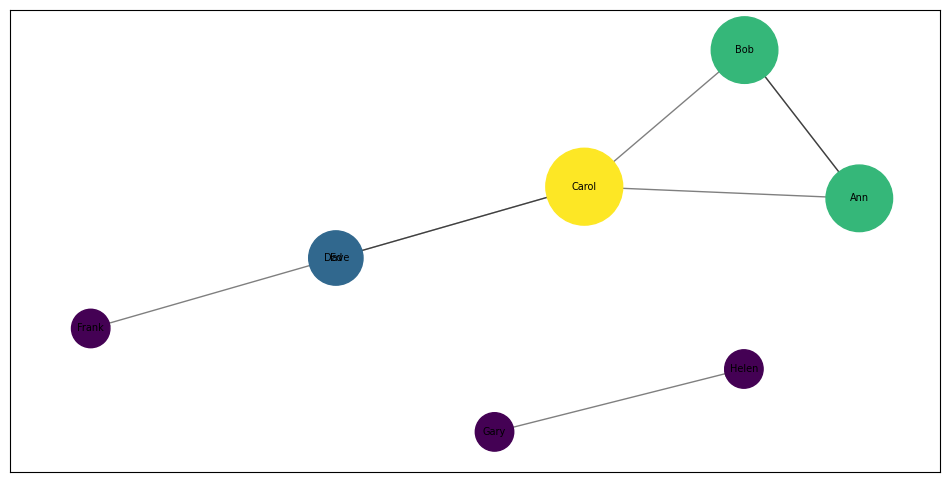

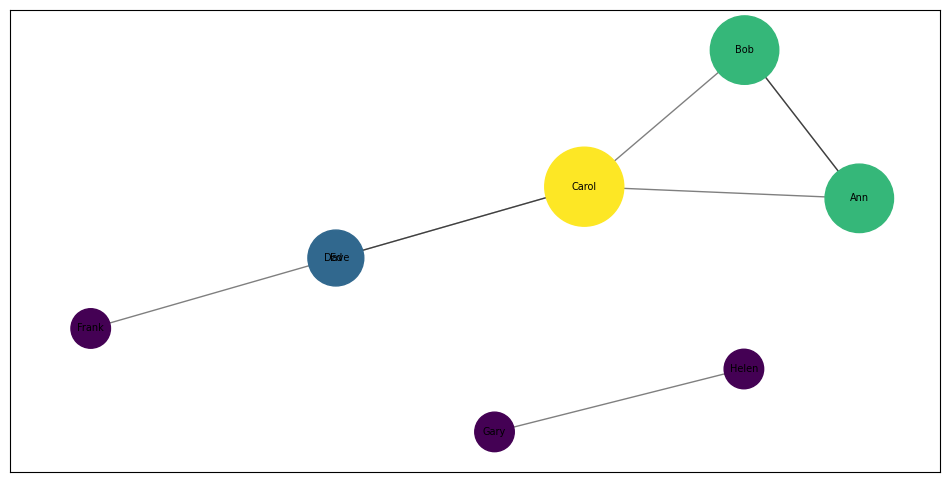

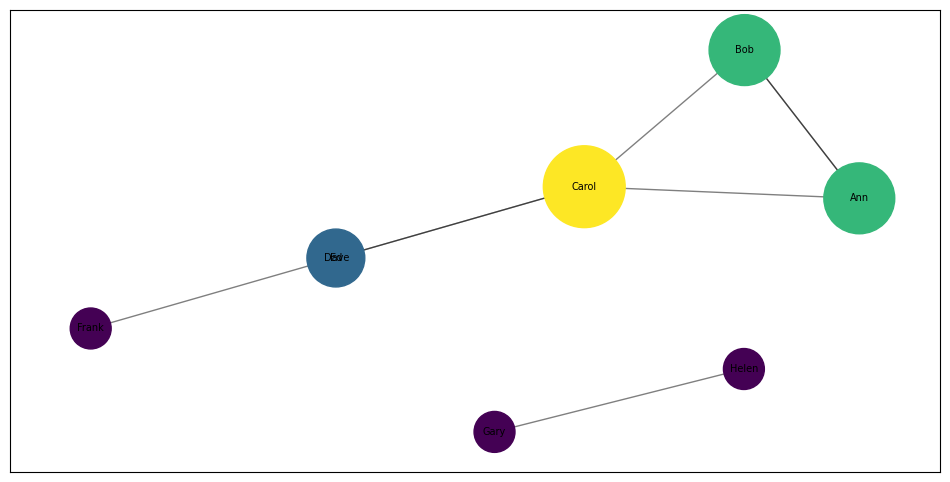

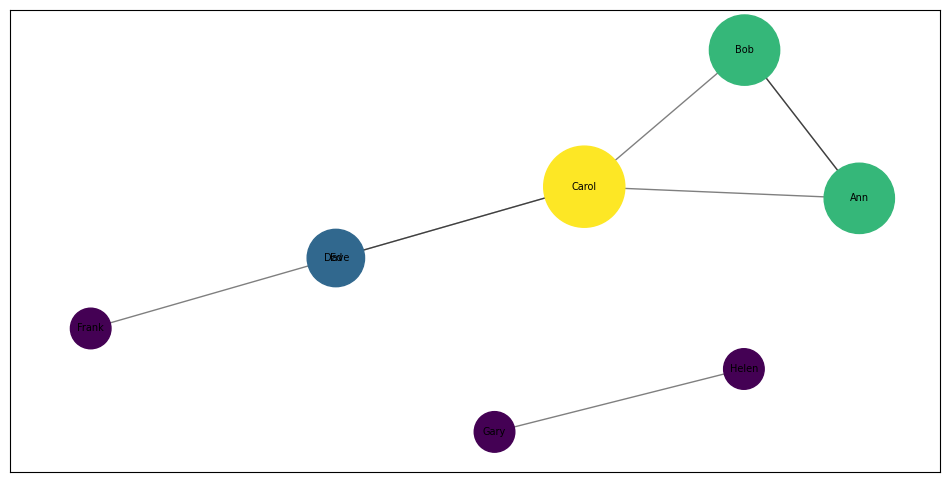

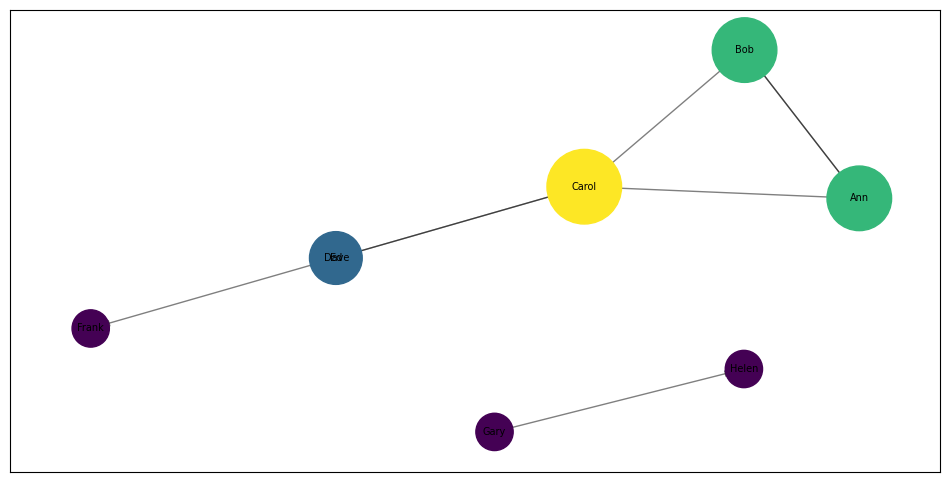

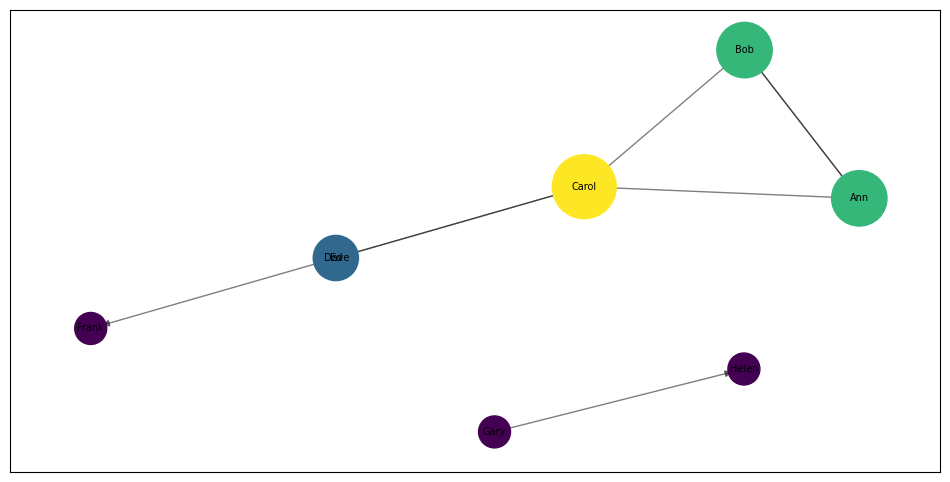

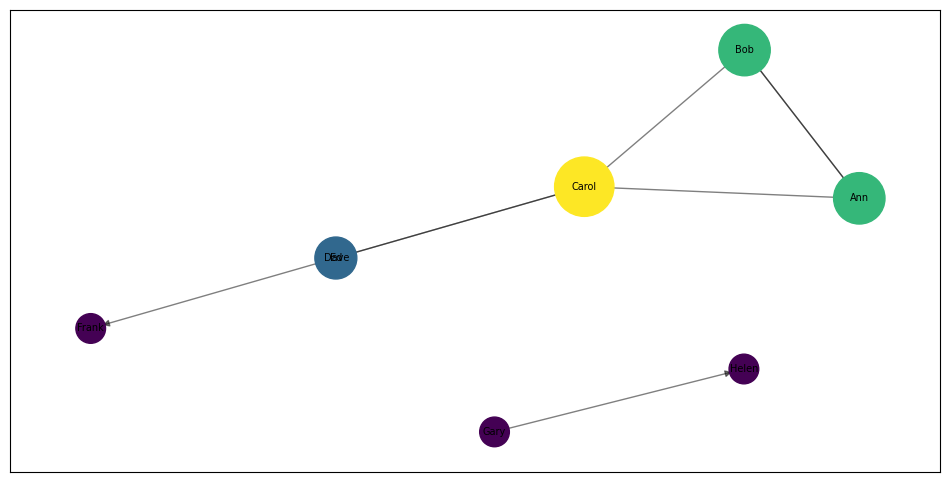

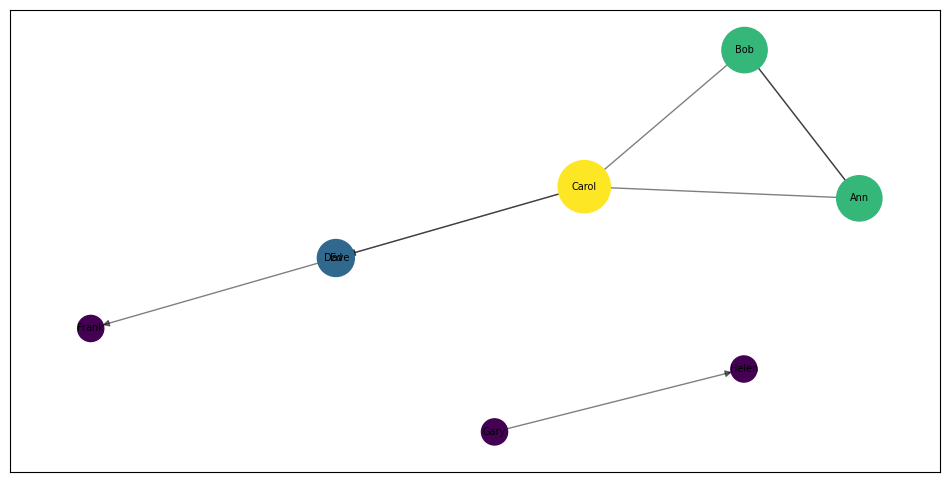

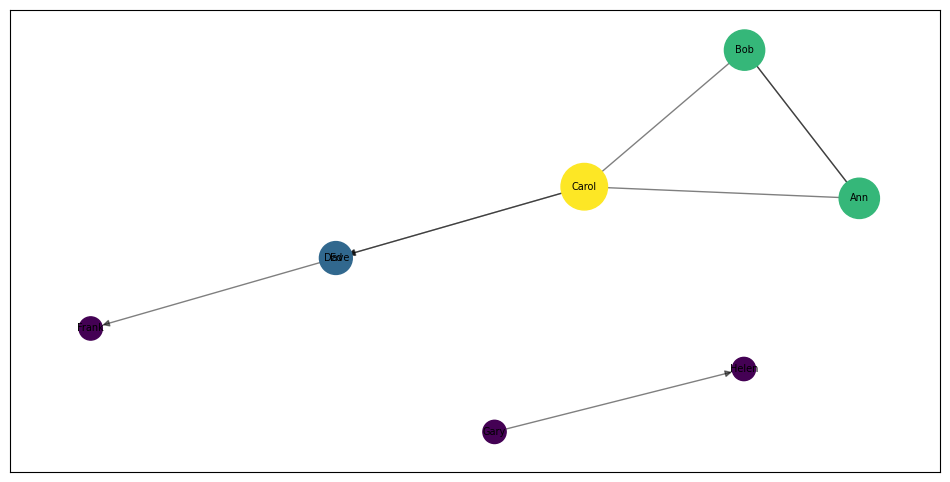

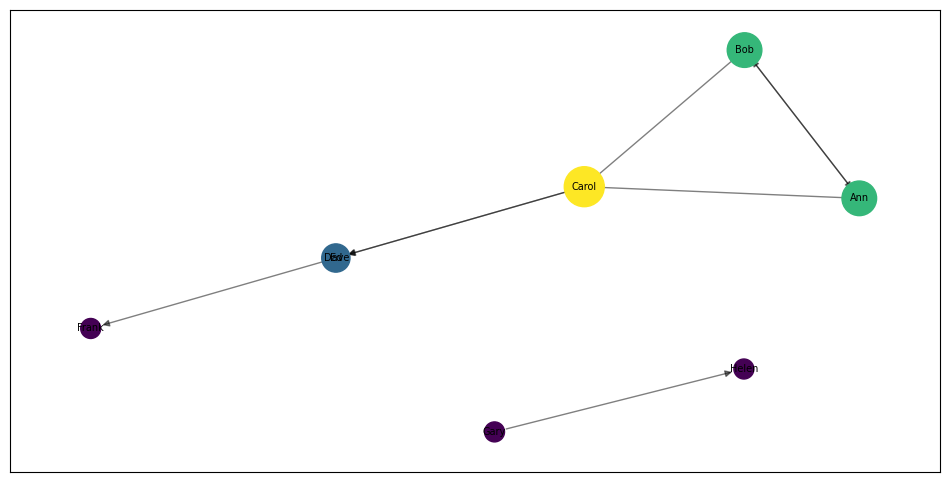

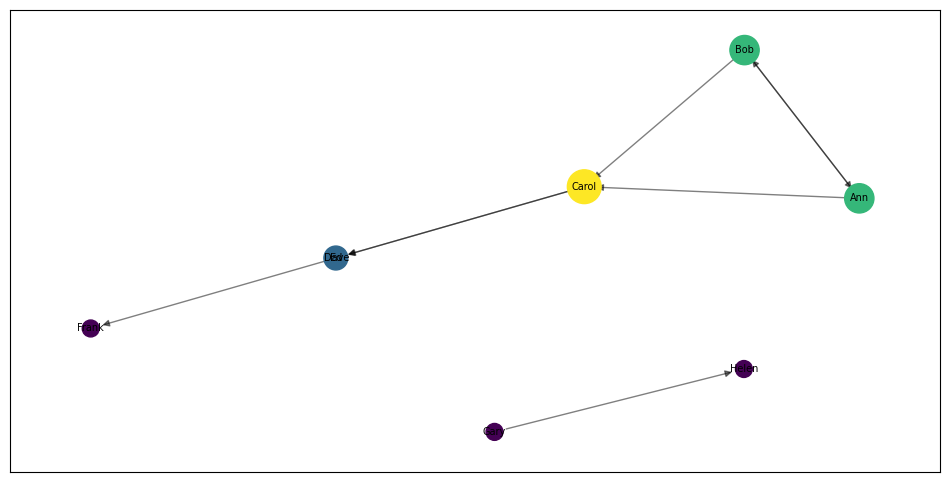

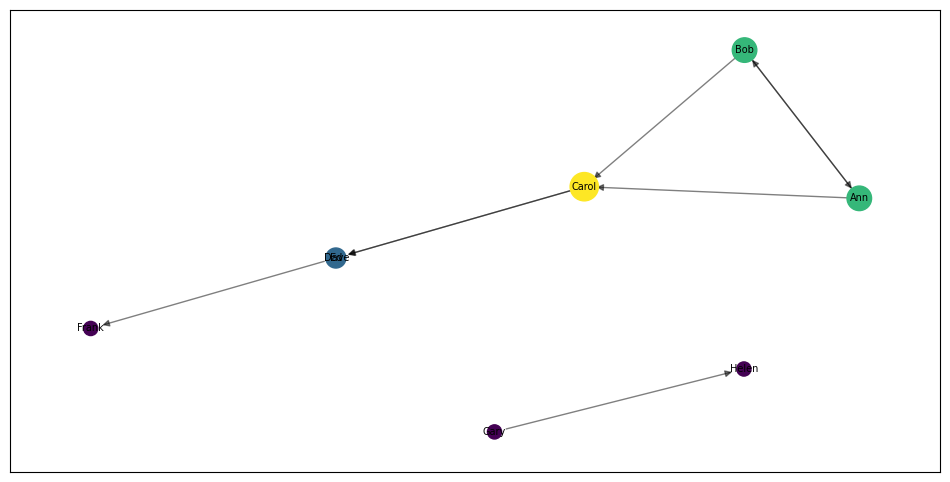

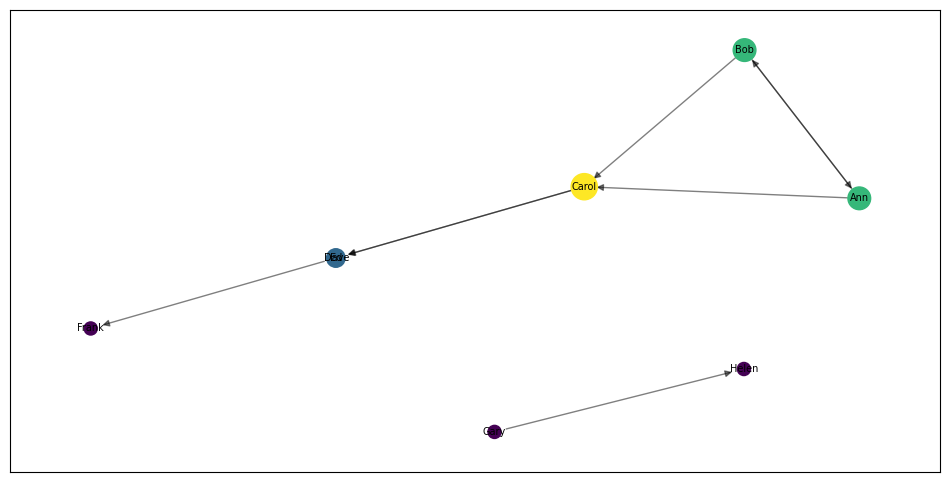

In [ ]:
# Create a new window
window = tk.Tk()
window.title("Social Media")
# Create a bold font object
font_bold = ("Arial", 20, "bold")

# Set the window size to full screen
window.geometry("{0}x{1}+0+0".format(window.winfo_screenwidth(), window.winfo_screenheight()))

# Define a function that opens a file dialog and returns the selected file path
def open_file_show_graph(type):
    try:
        global file_path
        file = filedialog.askopenfilename(filetypes=[('CSV Files', '*.csv')])
        if(type=='edge'):
            file_path=file
    except Exception as e:
            messagebox.showerror("Error", "Invalid CSV file")
                
# Add a label to the window
label_csv = tk.Label(window, text="Choose Your CSV",font=font_bold)
label_csv.place(x=50, y=50)
# Create a button widget that opens a file dialog when clicked
button_csv_node = tk.Button(window, text="Open CSV Node", command=lambda: open_file_show_graph("node"),width=30)
button_csv_edge = tk.Button(window, text="Open CSV Edge", command=lambda: open_file_show_graph("edge"),width=30)
button_csv_node.place(x=50, y=105)
button_csv_edge.place(x=50, y=135)

# Add a label to the window
label_type = tk.Label(window, text="Choose Type of Graph",font=font_bold)
label_type.place(x=50, y=180)

# Create two button widgets
button_directed = tk.Button(window, text="Directed Graph unweight",command=lambda: open_new_window("directed","unweighted"))
button_undirected = tk.Button(window, text="Undirected Graph unweight",command=lambda: open_new_window("undirected","unweighted"))

button_directed_weighted = tk.Button(window, text="Directed Graph Weighted",command=lambda: open_new_window("directed","weighted"))
button_undirected_weighted = tk.Button(window, text="Undirected Graph Weighted",command=lambda: open_new_window("undirected","weighted"))

# Position the buttons using the pack method
button_directed.place(x=50, y=245,width=160)
button_undirected.place(x=50, y=285,width=160)
button_directed_weighted.place(x=50, y=325,width=160)
button_undirected_weighted.place(x=50, y=365,width=160)

# Run the main event loop
window.mainloop()
#######################################################################################################################     
def open_new_window(type,weight):
    def back_to_main_window():
        new_window.destroy()
        window.mainloop()
    window.destroy()    
    if ((type == "undirected" or type=='directed') and weight=="unweighted"):
        if(type == "undirected"):
            G = read_graph(file_path,'undirected')
        else:
            G = read_graph(file_path,'directed')
        # Create a new window
        new_window = tk.Tk()
        new_window.title(f"{type} unweighted Graph")

        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_title("Virtualize the network")
        label = tk.Label(new_window, text="Change Node Size")
        label.pack()
        #slider bar
        slider_value = tk.DoubleVar()
        def change_node_size(val):
            node_color = [100 * G.degree(v) for v in G]
            node_size =  [float(val)*G.degree(v) for v in G] 
            draw(G,node_size,node_color,canvas)
            return node_size
        # Create the slider
        slider = tk.Scale(new_window, variable=slider_value, from_=1, to=1000, orient=tk.HORIZONTAL)
        slider.pack()
        canvas = FigureCanvasTkAgg(fig)
        
        slider.config(command=change_node_size)
        
        change_node_size(10)
        
        #buttons left
        label_community = tk.Label(new_window, text="Community Detection Algorithm")
        label_community.place(x=3, y=100)
        btn_Louvian = tk.Button(new_window, text="Louvian",command=lambda: louvian_community_detection(G,'no'))
        btn_Louvian.place(x=25, y=130,width=130)
        
        label_community_evualation = tk.Label(new_window, text="Community Detection Evaluations")
        label_community_evualation.place(x=0, y=190)
        btn_modularity = tk.Button(new_window, text="Modularity(Internal)",command=lambda:modularity_evualation(G,'no'))
        btn_modularity.place(x=25, y=220,width=130)
        btn_Condundance = tk.Button(new_window, text="Condundance(Internal)",command=lambda:condundace_internal(G,'no'))
        btn_Condundance.place(x=25, y=250,width=130)
        btn_NMI = tk.Button(new_window, text="NMI(External)",command=lambda:NMI_external(G,'no'))
        btn_NMI.place(x=25, y=280,width=130)
        label_linkanalysis = tk.Label(new_window, text="Link Analysis Technique")
        label_linkanalysis.place(x=25, y=340)
        btn_PageRank = tk.Button(new_window, text="Page Rank",command=lambda:page_rank(G,'no'))
        btn_PageRank.place(x=25, y=370,width=130)
        
        #buttons right
        label_centrality_measures = tk.Label(new_window, text="Centrality Measures")
        label_centrality_measures.place(x=1225, y=100)
        btn_degree_centrality = tk.Button(new_window, text="Degree Centrality",command=lambda:degree_centrality(G))
        btn_degree_centrality.place(x=1210, y=130,width=130)
        btn_betweeness_centrality = tk.Button(new_window, text="Betweenness Centrality",command=lambda:betweenness_centrality(G,'no'))
        btn_betweeness_centrality.place(x=1210, y=160,width=130)
        btn_closseness_centrality = tk.Button(new_window, text="Clossness Centrality",command=lambda:clossness_centrality(G,'no'))
        btn_closseness_centrality.place(x=1210, y=190,width=130)
        btn_harmonic_centrality = tk.Button(new_window, text="Harmonic Centrality",command=lambda:harmonic_centrality(G,'no'))
        btn_harmonic_centrality.place(x=1210, y=220,width=130)
        if(type=='undirected'):
            btn_eigenvector_centrality = tk.Button(new_window, text="Eigenvector Centrality",command=lambda:eigenvector_centrality(G,'no'))
            btn_eigenvector_centrality.place(x=1210, y=250,width=130)
        label_node_edge = tk.Label(new_window, text="Adjusting nodes and edges ")
        label_node_edge.place(x=1200, y=300)
        btn_node = tk.Button(new_window, text="node degree",command=lambda:adjust_node_degree(G))
        btn_node.place(x=1210, y=330,width=130)
        if(type=='undirected'):
            btn_edge = tk.Button(new_window, text="edge weight",command=lambda:edge_weight(file_path,'undirected'))
        else:
            btn_edge = tk.Button(new_window, text="edge weight",command=lambda:edge_weight(file_path,'directed'))
        btn_edge.place(x=1210, y=360,width=130)
        
        btn_back = tk.Button(new_window, text="Back",command=back_to_main_window)
        btn_back.place(x=1210, y=660,width=130)

    else:
        if(type == "undirected"):
            G = read_graph_weighted(file_path,'undirected')
        else:
            G = read_graph_weighted(file_path,'directed')
        # Create a new window
        new_window = tk.Tk()
        new_window.title(f"{type} weighted Graph")

        fig, ax = plt.subplots(figsize=(10, 15))
        ax.set_title("Virtualize the network",fontsize=28,fontweight="bold")
        #slider bar
        slider_value = tk.DoubleVar()
        def change_node_size(val):
            node_color = [100 * G.degree(v) for v in G]
            node_size =  [float(val)*G.degree(v) for v in G] 
            draw(G,node_size,node_color,canvas)
            return node_size
        # Create the slider
        slider = tk.Scale(new_window, variable=slider_value, from_=1, to=1000, orient=tk.HORIZONTAL)
        slider.pack()
        canvas = FigureCanvasTkAgg(fig)
        
        slider.config(command=change_node_size)
        
        change_node_size(10)
        
        # adjust_node_degree(G)
        
        #buttons left
        label_community = tk.Label(new_window, text="Community Detection Algorithm")
        label_community.place(x=3, y=100)
        btn_Louvian = tk.Button(new_window, text="Louvian",command=lambda: louvian_community_detection(G,'yes'))
        btn_Louvian.place(x=25, y=130,width=130)
        
        label_community_evualation = tk.Label(new_window, text="Community Detection Evaluations")
        label_community_evualation.place(x=0, y=190)
        btn_modularity = tk.Button(new_window, text="Modularity(Internal)",command=lambda:modularity_evualation(G,'yes'))
        btn_modularity.place(x=25, y=220,width=130)
        btn_Condundance = tk.Button(new_window, text="Condundance(Internal)",command=lambda:condundace_internal(G,'yes'))
        btn_Condundance.place(x=25, y=250,width=130)
        btn_NMI = tk.Button(new_window, text="NMI(External)",command=lambda:NMI_external(G,'yes'))
        btn_NMI.place(x=25, y=280,width=130)
        label_linkanalysis = tk.Label(new_window, text="Link Analysis Technique")
        label_linkanalysis.place(x=25, y=340)
        btn_PageRank = tk.Button(new_window, text="Page Rank",command=lambda:page_rank(G,'yes'))
        btn_PageRank.place(x=25, y=370,width=130)
        
        #buttons right
        label_centrality_measures = tk.Label(new_window, text="Centrality Measures")
        label_centrality_measures.place(x=1225, y=100)
        btn_degree_centrality = tk.Button(new_window, text="Degree Centrality",command=lambda:degree_centrality(G))
        btn_degree_centrality.place(x=1210, y=130,width=130)
        btn_betweeness_centrality = tk.Button(new_window, text="Betweenness Centrality",command=lambda:betweenness_centrality(G,'yes'))
        btn_betweeness_centrality.place(x=1210, y=160,width=130)
        btn_closseness_centrality = tk.Button(new_window, text="Clossness Centrality",command=lambda:clossness_centrality(G,'yes'))
        btn_closseness_centrality.place(x=1210, y=190,width=130)
        btn_harmonic_centrality = tk.Button(new_window, text="Harmonic Centrality",command=lambda:harmonic_centrality(G,'yes'))
        btn_harmonic_centrality.place(x=1210, y=220,width=130)
        if(type=='undirected'):
            btn_eigenvector_centrality = tk.Button(new_window, text="Eigenvector Centrality",command=lambda:eigenvector_centrality(G,'yes'))
            btn_eigenvector_centrality.place(x=1210, y=250,width=130)
        label_node_edge = tk.Label(new_window, text="Adjusting nodes and edges ")
        label_node_edge.place(x=1200, y=300)
        btn_node = tk.Button(new_window, text="node degree",command=lambda:adjust_node_degree(G))
        btn_node.place(x=1210, y=330,width=130)
        btn_edge = tk.Button(new_window, text="edge weight",command=lambda:edge_weight_weighted(G))
        btn_edge.place(x=1210, y=360,width=130)
        
        btn_back = tk.Button(new_window, text="Back",command=back_to_main_window)
        btn_back.place(x=1210, y=660,width=130)
    # Start the event loop for the new window
    new_window.mainloop()
########################################################################################################################     
